# Imports

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
SVI_import = 'SVI_2020_US_county.csv'

squatify_df_SVI = pd.read_csv(SVI_import)

squatify_df_SVI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Columns: 158 entries, ST to MP_OTHERRACE
dtypes: float64(75), int64(79), object(4)
memory usage: 3.8+ MB


In [3]:
elections_import = 'countypres_2000-2020.csv'

squatify_df_elections = pd.read_csv(elections_import)

squatify_df_elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72617 entries, 0 to 72616
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            72617 non-null  int64  
 1   state           72617 non-null  object 
 2   state_po        72617 non-null  object 
 3   county_name     72617 non-null  object 
 4   county_fips     72565 non-null  float64
 5   office          72617 non-null  object 
 6   candidate       72617 non-null  object 
 7   party           72617 non-null  object 
 8   candidatevotes  72617 non-null  int64  
 9   totalvotes      72617 non-null  int64  
 10  version         72617 non-null  int64  
 11  mode            72617 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.6+ MB


# Clean data

## Check for null values

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

null_values_count = squatify_df_SVI.isnull().sum()
print(null_values_count)

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
M_TOTPOP        0
E_HU            0
M_HU            0
E_HH            0
M_HH            0
E_POV150        0
M_POV150        0
E_UNEMP         0
M_UNEMP         0
E_HBURD         0
M_HBURD         0
E_NOHSDP        0
M_NOHSDP        0
E_UNINSUR       0
M_UNINSUR       0
E_AGE65         0
M_AGE65         0
E_AGE17         0
M_AGE17         0
E_DISABL        0
M_DISABL        0
E_SNGPNT        0
M_SNGPNT        0
E_LIMENG        0
M_LIMENG        0
E_MINRTY        0
M_MINRTY        0
E_MUNIT         0
M_MUNIT         0
E_MOBILE        0
M_MOBILE        0
E_CROWD         0
M_CROWD         0
E_NOVEH         0
M_NOVEH         0
E_GROUPQ        0
M_GROUPQ        0
EP_POV150       0
MP_POV150       0
EP_UNEMP        0
MP_UNEMP        0
EP_HBURD        0
MP_HBURD        0
EP_NOHSDP       0
MP_NOHSDP       0
EP_UNINSUR      0
MP_UNINSUR

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

null_values_count = squatify_df_elections.isnull().sum()
print(null_values_count)

year               0
state              0
state_po           0
county_name        0
county_fips       52
office             0
candidate          0
party              0
candidatevotes     0
totalvotes         0
version            0
mode               0
dtype: int64


## Drop irrelevant columns

In [6]:
"""columns_to_keep_SVI = ['STATE', 'COUNTY', 'FIPS', 'AREA_SQMI', 'E_TOTPOP', 'E_HU', 'E_HH', 'E_POV150', 
                       'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 'E_UNINSUR', 'E_AGE65', 'E_AGE17', 
                       'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 'E_MOBILE', 'E_CROWD',
                       'E_NOVEH', 'E_DAYPOP', 'E_NOINT']

columns_to_drop_SVI = [col for col in squatify_df_SVI.columns if col not in columns_to_keep_SVI]

squatify_df_SVI.drop(columns=columns_to_drop_SVI, inplace=True)"""

"columns_to_keep_SVI = ['STATE', 'COUNTY', 'FIPS', 'AREA_SQMI', 'E_TOTPOP', 'E_HU', 'E_HH', 'E_POV150', \n                       'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 'E_UNINSUR', 'E_AGE65', 'E_AGE17', \n                       'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 'E_MOBILE', 'E_CROWD',\n                       'E_NOVEH', 'E_DAYPOP', 'E_NOINT']\n\ncolumns_to_drop_SVI = [col for col in squatify_df_SVI.columns if col not in columns_to_keep_SVI]\n\nsquatify_df_SVI.drop(columns=columns_to_drop_SVI, inplace=True)"

## Archive list of dropped columns for future reference

In [7]:
"""squatify_df_SVI.drop(columns = [
    'ST', 'ST_ABBR', 'STCNTY', 'LOCATION'
    'M_TOTPOP', 'M_HU', 'M_HH', 'M_POV150', 'M_UNEMP', 'M_HBURD', 'M_NOHSDP', 'M_UNINSUR', 'M_AGE65', 
    'M_AGE17', 'M_DISABL', 'M_SNGPNT', 'M_LIMENG', 'M_MINRTY', 'M_MUNIT', 'M_MOBILE', 'M_CROWD', 
    'M_NOVEH', 'M_GROUPQ', 'MP_POV150', 'MP_UNEMP', 'MP_HBURD', 'MP_NOHSDP', 'MP_UNINSUR', 'MP_AGE65',
    'MP_AGE17', 'MP_DISABL', 'MP_SNGPNT', 'MP_MINRTY', 'MP_MUNIT', 'MP_MOBILE', 'MP_CROWD', 'MP_NOVEH',
    'MP_GROUPQ', 'M_NOINT', 'M_AFAM', 'M_HISP', 'M_ASIAN', 'M_AIAN', 'M_NHPI', 'M_TWOMORE', 'M_OTHERRACE',
    'MP_NOINT', 'MP_AFAM', 'MP_HISP', 'MP_ASIAN', 'MP_AIAN', 'MP_NHPI', 'MP_TWOMORE', 'MP_OTHERRACE'
    'E_POV150', 'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 'E_UNINSUR', 'E_AGE65', 'E_AGE17', 
    'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 'E_MOBILE', 'E_CROWD',
    'E_NOVEH', 'E_DAYPOP', 'E_NOINT', 'E_AFAM', 'E_HISP', 'E_ASIAN', 'E_AIAN', 'E_NHPI',
    'E_TWOMORE', 'E_OTHERRACE', 'E_GROUPQ', 'EP_NOINT', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN', 
    'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 
    'RPL_THEME4', 'RPL_THEMES', 'SPL_THEME1', 'SPL_THEME2', 'SPL_THEME3', 'SPL_THEME4', 'SPL_THEMES',
    'F_THEME1', 'F_THEME2', 'F_THEME3', 'F_THEME4', 'F_GROUPQ'], inplace = True)"""

"squatify_df_SVI.drop(columns = [\n    'ST', 'ST_ABBR', 'STCNTY', 'LOCATION'\n    'M_TOTPOP', 'M_HU', 'M_HH', 'M_POV150', 'M_UNEMP', 'M_HBURD', 'M_NOHSDP', 'M_UNINSUR', 'M_AGE65', \n    'M_AGE17', 'M_DISABL', 'M_SNGPNT', 'M_LIMENG', 'M_MINRTY', 'M_MUNIT', 'M_MOBILE', 'M_CROWD', \n    'M_NOVEH', 'M_GROUPQ', 'MP_POV150', 'MP_UNEMP', 'MP_HBURD', 'MP_NOHSDP', 'MP_UNINSUR', 'MP_AGE65',\n    'MP_AGE17', 'MP_DISABL', 'MP_SNGPNT', 'MP_MINRTY', 'MP_MUNIT', 'MP_MOBILE', 'MP_CROWD', 'MP_NOVEH',\n    'MP_GROUPQ', 'M_NOINT', 'M_AFAM', 'M_HISP', 'M_ASIAN', 'M_AIAN', 'M_NHPI', 'M_TWOMORE', 'M_OTHERRACE',\n    'MP_NOINT', 'MP_AFAM', 'MP_HISP', 'MP_ASIAN', 'MP_AIAN', 'MP_NHPI', 'MP_TWOMORE', 'MP_OTHERRACE'\n    'E_POV150', 'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 'E_UNINSUR', 'E_AGE65', 'E_AGE17', \n    'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 'E_MOBILE', 'E_CROWD',\n    'E_NOVEH', 'E_DAYPOP', 'E_NOINT', 'E_AFAM', 'E_HISP', 'E_ASIAN', 'E_AIAN', 'E_NHPI',\n    'E_TWOMORE', 'E_OTHERRACE', 'E_G

In [8]:
"""squatify_df_elections.drop(columns = ['state_po', 'county_fips', 'office', 'candidate', 'candidatevotes',
                                        'totalvotes', 'version', 'mode',inplace = True)"""

"squatify_df_elections.drop(columns = ['state_po', 'county_fips', 'office', 'candidate', 'candidatevotes',\n                                        'totalvotes', 'version', 'mode',inplace = True)"

## Drop irrelevant rows

In [9]:
squatify_df_elections.drop(squatify_df_elections[squatify_df_elections['year'] != 2020].index, inplace=True)

In [10]:
squatify_df_elections_sorted = squatify_df_elections.sort_values(by=['state', 'county_name', 'candidatevotes'], ascending=[True, True, False])

squatify_df_elections_highest_votes = squatify_df_elections_sorted.drop_duplicates(subset=['state', 'county_name'], keep='first').reset_index(drop=True)

In [11]:
columns_to_keep_elections = ['year', 'state', 'county_name', 'party']

columns_to_drop_elections = [col for col in squatify_df_elections_highest_votes.columns if col not in columns_to_keep_elections]

squatify_df_elections_highest_votes.drop(columns=columns_to_drop_elections, inplace=True)

In [13]:
squatify_df_elections_highest_votes.shape

(3155, 4)

In [14]:
squatify_df_SVI.shape

(3143, 158)

## Capitalize entries in SVI dataset

In [15]:
squatify_df_SVI['STATE'] = squatify_df_SVI['STATE'].str.upper()
squatify_df_SVI['COUNTY'] = squatify_df_SVI['COUNTY'].str.upper()

## Identify missing/mismatched state/county combinations

In [16]:
# Extract unique state/county combinations from both datasets
elections_combinations = set(zip(squatify_df_elections_highest_votes['state'], squatify_df_elections_highest_votes['county_name']))
SVI_combinations = set(zip(squatify_df_SVI['STATE'], squatify_df_SVI['COUNTY']))

# Find the combinations present in elections dataset but not in SVI dataset
missing_combinations = elections_combinations - SVI_combinations

# Print the missing combinations
print("State/County combinations present in elections dataset but not in SVI dataset:")
for state, county in missing_combinations:
    print(f"{state}, {county}")

State/County combinations present in elections dataset but not in SVI dataset:
ALASKA, DISTRICT 34
MINNESOTA, SAINT LOUIS
ALASKA, DISTRICT 24
ALASKA, DISTRICT 39
ALASKA, DISTRICT 10
ALASKA, DISTRICT 11
LOUISIANA, LA SALLE
ALASKA, DISTRICT 16
NEW MEXICO, DONA ANA
ALASKA, DISTRICT 19
ALASKA, DISTRICT 29
ALASKA, DISTRICT 6
ALASKA, DISTRICT 35
ALASKA, DISTRICT 33
ALASKA, DISTRICT 31
ALASKA, DISTRICT 8
RHODE ISLAND, FEDERAL PRECINCT
ALASKA, DISTRICT 17
ALASKA, DISTRICT 18
ALASKA, DISTRICT 9
ALASKA, DISTRICT 20
ALASKA, DISTRICT 13
ALASKA, DISTRICT 22
ALASKA, DISTRICT 3
ALASKA, DISTRICT 40
ALASKA, DISTRICT 12
ALASKA, DISTRICT 28
ALASKA, DISTRICT 21
ALASKA, DISTRICT 14
MISSOURI, KANSAS CITY
ALASKA, DISTRICT 36
ALASKA, DISTRICT 2
ALASKA, DISTRICT 23
ALASKA, DISTRICT 7
ALASKA, DISTRICT 1
ALASKA, DISTRICT 26
ALASKA, DISTRICT 32
MARYLAND, ST MARY'S
ALASKA, DISTRICT 4
ALASKA, DISTRICT 37
ALASKA, DISTRICT 5
ALASKA, DISTRICT 99
ALASKA, DISTRICT 27
MISSOURI, ST. LOUIS COUNTY
ALASKA, DISTRICT 38
ALASKA

In [17]:
# Drop entries from Alaska in both datasets
squatify_df_elections_highest_votes = squatify_df_elections_highest_votes[squatify_df_elections_highest_votes['state'] != 'ALASKA']
squatify_df_SVI = squatify_df_SVI[squatify_df_SVI['STATE'] != 'ALASKA']

# Verify the number of rows after dropping
print("Number of rows in squatify_df_elections_highest_votes after dropping Alaska entries:", len(squatify_df_elections_highest_votes))
print("Number of rows in squatify_df_SVI after dropping Alaska entries:", len(squatify_df_SVI))


Number of rows in squatify_df_elections_highest_votes after dropping Alaska entries: 3114
Number of rows in squatify_df_SVI after dropping Alaska entries: 3113


In [18]:
# Extract unique state/county combinations from both datasets
elections_combinations = set(zip(squatify_df_elections_highest_votes['state'], squatify_df_elections_highest_votes['county_name']))
SVI_combinations = set(zip(squatify_df_SVI['STATE'], squatify_df_SVI['COUNTY']))

# Find the combinations present in elections dataset but not in SVI dataset
missing_combinations = elections_combinations - SVI_combinations

# Print the missing combinations
print("State/County combinations present in elections dataset but not in SVI dataset:")
for state, county in missing_combinations:
    print(f"{state}, {county}")

State/County combinations present in elections dataset but not in SVI dataset:
MINNESOTA, SAINT LOUIS
MISSOURI, KANSAS CITY
RHODE ISLAND, FEDERAL PRECINCT
MISSOURI, ST. LOUIS COUNTY
MARYLAND, ST MARY'S
LOUISIANA, LA SALLE
NEW MEXICO, DONA ANA


In [19]:
# Extract unique state/county combinations from both datasets
elections_combinations = set(zip(squatify_df_elections_highest_votes['state'], squatify_df_elections_highest_votes['county_name']))
SVI_combinations = set(zip(squatify_df_SVI['STATE'], squatify_df_SVI['COUNTY']))

# Find the combinations present in elections dataset but not in SVI dataset
missing_combinations = SVI_combinations - elections_combinations

# Print the missing combinations
print("State/County combinations present in SVI dataset but not in elections dataset:")
for state, county in missing_combinations:
    print(f"{state}, {county}")

State/County combinations present in SVI dataset but not in elections dataset:
NEW MEXICO, DOÑA ANA
MISSOURI, ST. LOUIS
MARYLAND, ST. MARY'S
MINNESOTA, ST. LOUIS
HAWAII, KALAWAO
LOUISIANA, LASALLE


## rename mismatched state/county combinations 

In [20]:
replacements = {
    ('MINNESOTA', 'SAINT LOUIS'): ('MINNESOTA', 'ST. LOUIS'),
    ('LOUISIANA', 'LA SALLE'): ('LOUISIANA', 'LASALLE'),
    ('NEW MEXICO', 'DONA ANA'): ('NEW MEXICO', 'DOÑA ANA'),
    ('MISSOURI', 'ST. LOUIS COUNTY'): ('MISSOURI', 'ST. LOUIS'),
    ('MARYLAND', 'ST MARY\'S'): ('MARYLAND', 'ST. MARY\'S')
}

for (state, county), (new_state, new_county) in replacements.items():
    squatify_df_elections_highest_votes.loc[(squatify_df_elections_highest_votes['state'] == state) & 
                                             (squatify_df_elections_highest_votes['county_name'] == county), 
                                             ['state', 'county_name']] = new_state, new_county

In [21]:
# Extract unique state/county combinations from both datasets
elections_combinations = set(zip(squatify_df_elections_highest_votes['state'], squatify_df_elections_highest_votes['county_name']))
SVI_combinations = set(zip(squatify_df_SVI['STATE'], squatify_df_SVI['COUNTY']))

# Find the combinations present in elections dataset but not in SVI dataset
missing_combinations = SVI_combinations - elections_combinations

# Print the missing combinations
print("State/County combinations present in SVI dataset but not in elections dataset:")
for state, county in missing_combinations:
    print(f"{state}, {county}")

State/County combinations present in SVI dataset but not in elections dataset:
HAWAII, KALAWAO


In [22]:
# Extract unique state/county combinations from both datasets
elections_combinations = set(zip(squatify_df_elections_highest_votes['state'], squatify_df_elections_highest_votes['county_name']))
SVI_combinations = set(zip(squatify_df_SVI['STATE'], squatify_df_SVI['COUNTY']))

# Find the combinations present in elections dataset but not in SVI dataset
missing_combinations = elections_combinations - SVI_combinations

# Print the missing combinations
print("State/County combinations present in elections dataset but not in SVI dataset:")
for state, county in missing_combinations:
    print(f"{state}, {county}")

State/County combinations present in elections dataset but not in SVI dataset:
MISSOURI, KANSAS CITY
RHODE ISLAND, FEDERAL PRECINCT


In [23]:
# Define the state and county combinations to be dropped
rows_to_drop = [
    ('RHODE ISLAND', 'FEDERAL PRECINCT'),
    ('MISSOURI', 'KANSAS CITY')
]

# Iterate over the state and county combinations and drop the corresponding rows
for state, county in rows_to_drop:
    rows_to_drop_indices = squatify_df_elections_highest_votes[(squatify_df_elections_highest_votes['state'] == state) & 
                                                               (squatify_df_elections_highest_votes['county_name'] == county)].index
    # Use .loc to explicitly reference the original DataFrame and avoid the warning
    squatify_df_elections_highest_votes.drop(rows_to_drop_indices, inplace=True)

/var/folders/h2/9gj18zsj0_97sn4v3pb36c6h0000gn/T/ipykernel_41334/1909025809.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squatify_df_elections_highest_votes.drop(rows_to_drop_indices, inplace=True)


## Drop missing state/counties from each dataset

In [24]:
# Define the state and county combinations to be dropped
rows_to_drop = [
    ('HAWAII', 'KALAWAO'),
]

# Iterate over the state and county combinations and drop the corresponding rows
for state, county in rows_to_drop:
    rows_to_drop_indices = squatify_df_SVI[(squatify_df_SVI['STATE'] == state) & 
                                                               (squatify_df_SVI['COUNTY'] == county)].index
    # Use .loc to explicitly reference the original DataFrame and avoid the warning
    squatify_df_SVI.drop(rows_to_drop_indices, inplace=True)


In [25]:
# Extract unique state/county combinations from both datasets
elections_combinations = set(zip(squatify_df_elections_highest_votes['state'], squatify_df_elections_highest_votes['county_name']))
SVI_combinations = set(zip(squatify_df_SVI['STATE'], squatify_df_SVI['COUNTY']))

# Find the combinations present in elections dataset but not in SVI dataset
missing_combinations = elections_combinations - SVI_combinations

# Print the missing combinations
print("State/County combinations present in elections dataset but not in SVI dataset:")
for state, county in missing_combinations:
    print(f"{state}, {county}")

State/County combinations present in elections dataset but not in SVI dataset:


## Rename elections dataframe columns

In [26]:
squatify_df_elections_highest_votes.rename(columns={'state': 'STATE', 'county_name': 'COUNTY', 'party': "PARTY"}, inplace=True)

/var/folders/h2/9gj18zsj0_97sn4v3pb36c6h0000gn/T/ipykernel_41334/596593005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squatify_df_elections_highest_votes.rename(columns={'state': 'STATE', 'county_name': 'COUNTY', 'party': "PARTY"}, inplace=True)


# Merge dataframes

In [ ]:
squatify_df = pd.merge(squatify_df_elections_highest_votes, squatify_df_SVI, on=['STATE', 'COUNTY'], how='inner')

In [28]:
# Assuming squatify_df is your DataFrame containing the data
value_EP_MINRTY = squatify_df.loc[squatify_df['COUNTY'] == 'AUTAUGA', 'EP_MINRTY'].values[0]

print("Value of EP_MINRTY for AUTUAGUA:", value_EP_MINRTY)


Value of EP_MINRTY for AUTUAGUA: 26.0


In [29]:
squatify_df.to_csv('squatify_df.csv', index=False)

## Drop columns from merged dataframe

In [30]:
columns_to_keep = ['FIPS', 'AREA_SQMI', 'E_TOTPOP', 'E_HU', 'E_HH', 'E_POV150', 
                       'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 'E_UNINSUR', 'E_AGE65', 'E_AGE17', 
                       'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 'E_MOBILE', 'E_CROWD',
                       'E_NOVEH', 'E_DAYPOP', 'E_NOINT']

squatify_df_cleaned = [col for col in squatify_df.columns if col not in columns_to_keep]

## Reorder columns because I'm anal

In [31]:
cols_order = ['FIPS', 'AREA_SQMI', 'E_TOTPOP', 'E_HU', 'E_HH', 'E_POV150', 'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 
              'E_UNINSUR', 'E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 
              'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_DAYPOP', 'E_NOINT', 'PARTY']

squatify_df_cleaned = squatify_df[cols_order]

# Plot data

In [ ]:
"""for column in squatify_df_cleaned.columns:
    plt.hist(squatify_df[column], bins=20) 
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()"""

# Preprocess data

## Define target variable

In [34]:
X = squatify_df_cleaned.drop(columns=['PARTY'])

y = squatify_df_cleaned['PARTY']

## Split data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Transform data

In [36]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Instantiate the model

In [37]:
model = LogisticRegression(max_iter=10000)

## Fit model to training data

In [38]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Test the model

## Make predictions

In [39]:
y_pred = model.predict(X_test)

## Evaluate model

In [40]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", logistic_scores)
print("Mean Accuracy:", logistic_scores.mean())

Logistic Regression Cross-Validation Scores: [0.90562249 0.8935743  0.87951807 0.90562249 0.87525151]
Mean Accuracy: 0.8919177716903833


## Cross validate

### with KNN

In [41]:
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_scores)
print("Mean Accuracy:", knn_scores.mean())

KNN Cross-Validation Scores: [0.87550201 0.87550201 0.86546185 0.88955823 0.86720322]
Mean Accuracy: 0.8746454631402875


### with Decision Tree

In [42]:
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy:", dt_scores.mean())

Decision Tree Cross-Validation Scores: [0.86345382 0.8313253  0.84939759 0.84738956 0.85714286]
Mean Accuracy: 0.8497418244406196


### with Random Forest

In [43]:
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.90361446 0.88955823 0.8875502  0.90160643 0.87525151]
Mean Accuracy: 0.8915161652646806


### with Gradiant Boosting

In [44]:
gb_model = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Cross-Validation Scores:", gb_scores)
print("Mean Accuracy:", gb_scores.mean())

Gradient Boosting Cross-Validation Scores: [0.90361446 0.90963855 0.90160643 0.89558233 0.89336016]
Mean Accuracy: 0.9007603856068135


### with Support Vector Machines

In [45]:
svm_model = SVC()
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)
print("Mean Accuracy:", svm_scores.mean())

SVM Cross-Validation Scores: [0.88955823 0.87349398 0.86144578 0.87951807 0.861167  ]
Mean Accuracy: 0.8730366132538201


### with Neural Networks

In [46]:
nn_model = MLPClassifier()
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
print("Neural Network Cross-Validation Scores:", nn_scores)
print("Mean Accuracy:", nn_scores.mean())

Neural Network Cross-Validation Scores: [0.84939759 0.88955823 0.88353414 0.86947791 0.86720322]
Mean Accuracy: 0.8718342181603678


## Check for overfitting with best model

In [47]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


y_train_pred = gb_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy)
print("Average Cross-Validation Score:", np.mean(gb_scores))


Training Accuracy: 0.952591402169546
Average Cross-Validation Score: 0.9007603856068135


## Reduce overfitting

### Remove features

In [48]:
gb_model.fit(X_train, y_train)

feature_importances = gb_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

feature_names = X_train.columns

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} ({feature_importances[indices[f]]})")

Feature ranking:
1. Feature E_MINRTY (0.19240727239379468)
2. Feature E_MUNIT (0.17749941410607448)
3. Feature E_NOVEH (0.16061784016890718)
4. Feature FIPS (0.0846833335617661)
5. Feature E_NOHSDP (0.052175228898418566)
6. Feature AREA_SQMI (0.05160380021155326)
7. Feature E_UNINSUR (0.04097070626111715)
8. Feature E_MOBILE (0.03292312871807067)
9. Feature E_AGE17 (0.02835371319284353)
10. Feature E_HBURD (0.02426240293704312)
11. Feature E_UNEMP (0.02403088324482837)
12. Feature E_TOTPOP (0.02294072835434864)
13. Feature E_SNGPNT (0.01809673657256739)
14. Feature E_DAYPOP (0.017848823690595532)
15. Feature E_LIMENG (0.0175370910652827)
16. Feature E_AGE65 (0.013644454478390399)
17. Feature E_HU (0.011928730477417823)
18. Feature E_CROWD (0.009538330036982682)
19. Feature E_HH (0.00728437789847439)
20. Feature E_NOINT (0.00602277887790507)
21. Feature E_DISABL (0.004408394475001316)
22. Feature E_POV150 (0.001221830378616907)


In [49]:
squatify_df_feature_shortlist = squatify_df_cleaned.drop(columns = [
    'FIPS',
    'AREA_SQMI',
    'E_NOHSDP',
    'E_UNINSUR',
    'E_MOBILE',
    'E_AGE17',
    'E_UNEMP',
    'E_HBURD',
    'E_TOTPOP',
    'E_SNGPNT',
    'E_DAYPOP',
    'E_LIMENG',
    'E_HU',
    'E_AGE65',
    'E_CROWD',
    'E_HH',
    'E_NOINT',
    'E_DISABL',
    'E_POV150'])

### Reconduct test

In [50]:
X = squatify_df_feature_shortlist.drop(columns=['PARTY'])

y = squatify_df_feature_shortlist['PARTY']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model = LogisticRegression(max_iter=10000)

In [54]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [55]:
y_pred = model.predict(X_test)

In [56]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", logistic_scores)
print("Mean Accuracy:", logistic_scores.mean())

Logistic Regression Cross-Validation Scores: [0.89156627 0.87951807 0.86546185 0.87951807 0.86519115]
Mean Accuracy: 0.87625108078188


In [57]:
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_scores)
print("Mean Accuracy:", knn_scores.mean())

KNN Cross-Validation Scores: [0.86546185 0.86345382 0.87148594 0.8875502  0.85513078]
Mean Accuracy: 0.868616518387433


In [58]:
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy:", dt_scores.mean())

Decision Tree Cross-Validation Scores: [0.8313253  0.80522088 0.82730924 0.81726908 0.81086519]
Mean Accuracy: 0.8183979378277698


In [59]:
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.87550201 0.86546185 0.85943775 0.8815261  0.85714286]
Mean Accuracy: 0.867814113597246


In [60]:
gb_model = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Cross-Validation Scores:", gb_scores)
print("Mean Accuracy:", gb_scores.mean())

Gradient Boosting Cross-Validation Scores: [0.86746988 0.86144578 0.86144578 0.89558233 0.85513078]
Mean Accuracy: 0.8682149119617304


In [61]:
svm_model = SVC()
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)
print("Mean Accuracy:", svm_scores.mean())

SVM Cross-Validation Scores: [0.8875502  0.87148594 0.86746988 0.88554217 0.86519115]
Mean Accuracy: 0.8754478679304745


In [62]:
nn_model = MLPClassifier()
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
print("Neural Network Cross-Validation Scores:", nn_scores)
print("Mean Accuracy:", nn_scores.mean())

Neural Network Cross-Validation Scores: [0.7811245  0.81526104 0.82329317 0.79317269 0.64788732]
Mean Accuracy: 0.7721477459132304


### check for overfitting with best model

In [70]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_train_pred = logistic_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

avg_cv_score = np.mean(logistic_scores)
print("Average Cross-Validation Score:", avg_cv_score)

Training Accuracy: 0.875050220972278
Average Cross-Validation Score: 0.87625108078188


## Check confusion matrix

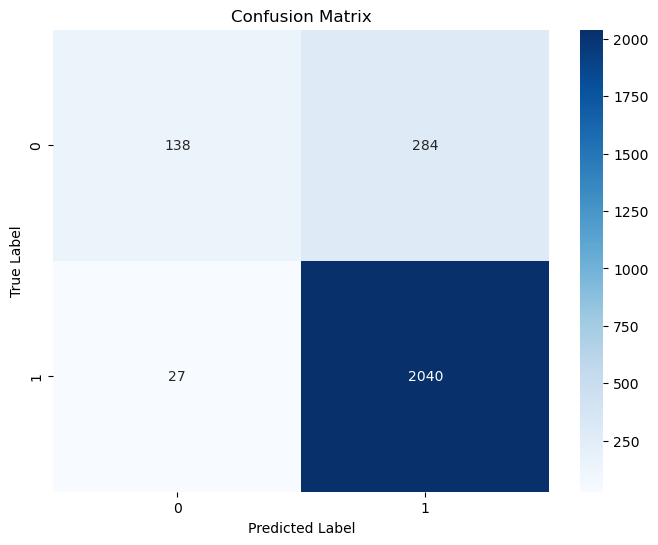

In [74]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Balance dataset

In [75]:
y_train.value_counts()

PARTY
REPUBLICAN    2067
DEMOCRAT       422
Name: count, dtype: int64

In [77]:
smote = SMOTE(random_state=42)

X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [84]:
y_sm.value_counts()

PARTY
REPUBLICAN    2067
DEMOCRAT      2067
Name: count, dtype: int64

In [107]:
logistic_model = LogisticRegression()

logistic_model.fit(X_sm_scaled, y_sm)

LogisticRegression()

In [113]:
y_pred = logistic_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Make it interactive

## Define relevant scalers and functions

In [110]:
scaler = StandardScaler()

X_sm_scaled = scaler.fit_transform(X_sm)
X_test_scaled = scaler.transform(X_test)

def preprocess_user_input(user_input_E_MINRTY, user_input_E_MUNIT, user_input_E_NOVEH):
    user_data = [[user_input_E_MINRTY, user_input_E_MUNIT, user_input_E_NOVEH]]
    user_data_scaled = scaler.transform(user_data)
    return user_data_scaled

## It is 2028. The U.S. has expanded due to Emperor Trump's aggressive war against NATO. You are the government representative of Ardenia, a county in the state of Covfefe.

## You have hired a political consulting firm to assess whether the majority of your county are Democrat sympathizers or not. They have a machine learning model that will tell you which political party would win given an election...if that were still an option.

In [ ]:
print("Refrain from using commas or periods while entering the following numerical data requested.")

while True:
    user_input_E_MINRTY = input("Enter the estimated number of non-Caucasians (Hispanic or Latino; Black and African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Two or More Races; Other Races): ")
    if ',' in user_input_E_MINRTY or '.' in user_input_E_MINRTY:
        print("Please do not enter commas or periods.")
        continue 
    try:
        user_input_E_MINRTY = int(user_input_E_MINRTY)
        break
    except ValueError:
        print("Please enter a valid integer.")

print("Estimated number of non-Caucasians:", user_input_E_MINRTY)

while True:
    user_input_E_MUNIT = input("Enter the estimated number of buildings containing 10 or more housing units: ")
    if ',' in user_input_E_MUNIT or '.' in user_input_E_MUNIT:
        print("Please do not enter commas or periods.")
        continue
    try:
        user_input_E_MUNIT = int(user_input_E_MUNIT)
        break
    except ValueError:
        print("Please enter a valid integer.")

print("Estimated number of buildings containing 10 or more housing units:", user_input_E_MUNIT)

while True:
    user_input_E_NOVEH = input("Enter the estimated number of people with no vehicle: ")
    if ',' in user_input_E_NOVEH or '.' in user_input_E_NOVEH:
        print("Please do not enter commas or periods.")
        continue
    try:
        user_input_E_NOVEH = int(user_input_E_NOVEH)
        break
    except ValueError:
        print("Please enter a valid integer.")

print("Estimated number of people with no vehicle:", user_input_E_NOVEH)

print("Calculating the probable election outcome of the old regime, given the entered data...")

user_data_scaled = preprocess_user_input(user_input_E_MINRTY, user_input_E_MUNIT, user_input_E_NOVEH)

prediction = logistic_model.predict(user_data_scaled)
prediction_prob = logistic_model.predict_proba(user_data_scaled)
print("Predicted outcome:", prediction)

Refrain from using commas or periods while entering the following numerical data requested.
